In [1]:
from graphing import generate_box_score_figure, get_team_roster
from nba_api.stats.static.players import find_players_by_first_name, find_players_by_last_name

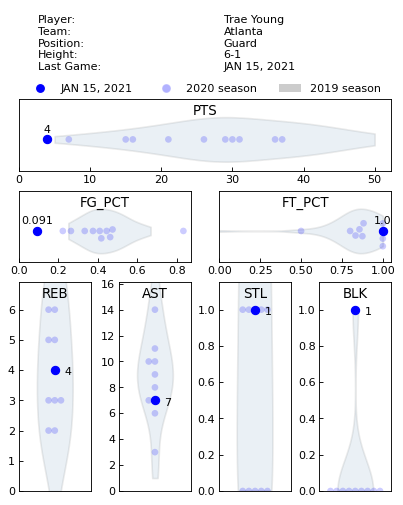

In [2]:
info = find_players_by_first_name('Trae')
this_season = 2020
generate_box_score_figure(player_id = info[0]['id'], this_season = this_season)